# Análisis, diseño, y simulación de un sistema de clasificación basado en técnicas de aprendizaje de máquina para Human Activity Recognition


---


## Descripcion del problema
El reconocimiento automático de actividades humanas a partir de datos de sensores móviles es un desafío fundamental para desarrollar aplicaciones inteligentes que mejoren la calidad de vida. Identificar con precisión qué actividad está realizando una persona, como caminar, sentarse o subir escaleras, permite crear sistemas personalizados para monitoreo de salud, asistencia a personas mayores, control deportivo y entornos de interacción adaptativa.

El uso de técnicas de Machine Learning (ML) ofrece un enfoque efectivo para resolver este problema, ya que permite construir modelos capaces de aprender automáticamente las características discriminativas de las actividades a partir de grandes volúmenes de datos. Estos modelos pueden adaptarse a diferentes usuarios y condiciones, ofreciendo precisión y robustez en entornos reales.

## Estado del arte
A partir de los experimentos realizados en otros artículos, podemos observar que existen factores clave en la obtención de buenos resultados usando modelos de inteligencia artificial para la clasificación de HAR, como son la posición de los sensores en el cuerpo humano, las características físicas del sujeto y la utilización de métodos de validación cruzada robustos.

### 1. Obtención de los dataset

In [24]:
!wget https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip

--2025-07-09 01:46:31--  https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘human+activity+recognition+using+smartphones.zip.1’

human+activity+reco     [     <=>            ]  58.18M  61.2MB/s    in 1.0s    

2025-07-09 01:46:32 (61.2 MB/s) - ‘human+activity+recognition+using+smartphones.zip.1’ saved [61005872]



In [25]:
import zipfile
import os

# Nombre del archivo ZIP
zip_file = "/content/human+activity+recognition+using+smartphones.zip"

# Carpeta de destino
extract_dir = "UCI_HAR_Dataset"

# Extraer contenido del ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Descomprimido exitosamente")


✅ Descomprimido exitosamente


In [26]:
# Nombre del archivo ZIP
zip_file = "/content/UCI_HAR_Dataset/UCI HAR Dataset.zip"

# Carpeta de destino
extract_dir = "UCI_HAR_Dataset"

# Extraer contenido del ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Descomprimido exitosamente")

✅ Descomprimido exitosamente


In [27]:
for root, dirs, files in os.walk(extract_dir):
    level = root.replace(extract_dir, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


UCI_HAR_Dataset/
    UCI HAR Dataset.names
    UCI HAR Dataset.zip
    UCI HAR Dataset/
        features_info.txt
        activity_labels.txt
        .DS_Store
        README.txt
        features.txt
        train/
            y_train.txt
            subject_train.txt
            X_train.txt
            Inertial Signals/
                body_gyro_x_train.txt
                total_acc_x_train.txt
                total_acc_z_train.txt
                body_acc_z_train.txt
                body_gyro_z_train.txt
                body_gyro_y_train.txt
                body_acc_y_train.txt
                body_acc_x_train.txt
                total_acc_y_train.txt
        test/
            X_test.txt
            subject_test.txt
            y_test.txt
            Inertial Signals/
                body_acc_z_test.txt
                body_gyro_y_test.txt
                body_gyro_z_test.txt
                total_acc_z_test.txt
                body_gyro_x_test.txt
                total_acc_y_test.tx

In [28]:
import pandas as pd

# Ruta base
base_path = "/content/UCI_HAR_Dataset/UCI HAR Dataset/train/"

# Cargar los datos
X_train = pd.read_csv(base_path + "X_train.txt", sep='\s+', header=None)
y_train = pd.read_csv(base_path + "y_train.txt", sep='\s+', header=None)
subject_train = pd.read_csv(base_path + "subject_train.txt", sep='\s+', header=None)

# Traer los nombres de las columnas
features_path = "UCI_HAR_Dataset/UCI HAR Dataset/features.txt"
features = pd.read_csv(features_path, sep='\s+', header=None)
feature_names = features[1].tolist()

# Asignar nombres a las columnas
X_train.columns = feature_names

# Mostrar las primeras filas
print("📊 X_train:")
display(X_train.head())

print("🏷️ y_train:")
display(y_train.head())

print("🧑 subject_train:")
display(subject_train.head())

📊 X_train:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


🏷️ y_train:


,0
0,5
1,5
2,5
3,5
4,5


🧑 subject_train:


,0
0,1
1,1
2,1
3,1
4,1


In [29]:
# Ruta base
base_path = "/content/UCI_HAR_Dataset/UCI HAR Dataset/test/"

# Cargar los datos
X_test = pd.read_csv(base_path + "X_test.txt", sep='\s+', header=None)
y_test = pd.read_csv(base_path + "y_test.txt", sep='\s+', header=None)
subject_test = pd.read_csv(base_path + "subject_test.txt", sep='\s+', header=None)

# Traer los nombres de las columnas
features_path = "UCI_HAR_Dataset/UCI HAR Dataset/features.txt"
features = pd.read_csv(features_path, sep='\s+', header=None)
feature_names = features[1].tolist()

# Asignar nombres a las columnas
X_test.columns = feature_names

# Mostrar las primeras filas
print("📊 X_test:")
display(X_test.head())

print("🏷️ y_test:")
display(y_test.head())

print("🧑 subject_test:")
display(subject_test.head())

📊 X_test:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


🏷️ y_test:


,0
0,5
1,5
2,5
3,5
4,5


🧑 subject_test:


,0
0,2
1,2
2,2
3,2
4,2


### 2. Exploración inicial de los datos

In [30]:
# Dimensiones de los datos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de subject_train: {subject_train.shape}")
print("\n")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")
print(f"Dimensiones de subject_test: {subject_test.shape}")

Dimensiones de X_train: (7352, 561)
Dimensiones de y_train: (7352, 1)
Dimensiones de subject_train: (7352, 1)


Dimensiones de X_test: (2947, 561)
Dimensiones de y_test: (2947, 1)
Dimensiones de subject_test: (2947, 1)


In [31]:
# Verificar valores faltantes en X_train, y_train y subject_train
missing_values_X = X_train.isnull().sum().sum()
missing_values_y = y_train.isnull().sum().sum()
missing_values_subject = subject_train.isnull().sum().sum()

print(f"Existen valores faltantes en X_train? {'Sí' if missing_values_X > 0 else 'No'}")
print(f"Total de valores faltantes: {missing_values_X}")
print(f"Existen valores faltantes en y_train? {'Sí' if missing_values_y > 0 else 'No'}")
print(f"Total de valores faltantes: {missing_values_y}")
print(f"Existen valores faltantes en subject_train? {'Sí' if missing_values_subject > 0 else 'No'}")
print(f"Total de valores faltantes: {missing_values_subject}")

Existen valores faltantes en X_train? No
Total de valores faltantes: 0
Existen valores faltantes en y_train? No
Total de valores faltantes: 0
Existen valores faltantes en subject_train? No
Total de valores faltantes: 0


In [32]:
# Verificar valores faltantes en X_test, y_test y subject_test
missing_values_X = X_test.isnull().sum().sum()
missing_values_y = y_test.isnull().sum().sum()
missing_values_subject = subject_test.isnull().sum().sum()

print(f"Existen valores faltantes en X_test? {'Sí' if missing_values_X > 0 else 'No'}")
print(f"Total de valores faltantes: {missing_values_X}")
print(f"Existen valores faltantes en y_test? {'Sí' if missing_values_y > 0 else 'No'}")
print(f"Total de valores faltantes: {missing_values_y}")
print(f"Existen valores faltantes en subject_test? {'Sí' if missing_values_subject > 0 else 'No'}")
print(f"Total de valores faltantes: {missing_values_subject}")

Existen valores faltantes en X_test? No
Total de valores faltantes: 0
Existen valores faltantes en y_test? No
Total de valores faltantes: 0
Existen valores faltantes en subject_test? No
Total de valores faltantes: 0


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Verificar que no se repitan los sujetos entre pruebas y entrenamiento

print(f"Sujetos del conjunto de entrenamiento: {np.unique(subject_train)}")
print(f"Sujetos del conjunto de pruebas: {np.unique(subject_test)}")

shared_values = list(np.intersect1d(np.unique(subject_train), np.unique(subject_test)))
print(f"Existen sujetos iguales entre subject_test y subject_train? {'Sí' if bool(shared_values) else 'No'}")
print(f"Sujetos compartidos: {shared_values}")

Sujetos del conjunto de entrenamiento: [ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
Sujetos del conjunto de pruebas: [ 2  4  9 10 12 13 18 20 24]
Existen sujetos iguales entre subject_test y subject_train? No
Sujetos compartidos: []


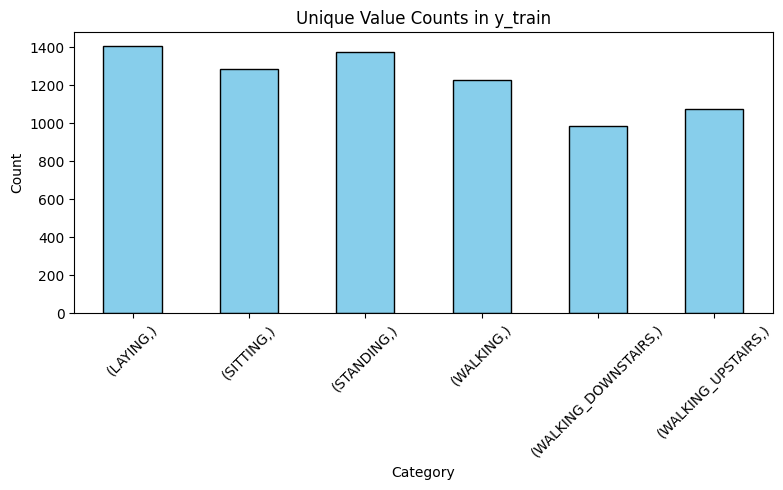

In [34]:
# Contar valores unicos en y_train
activity_map = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

y_train_names = y_train.replace(activity_map)
value_counts = y_train_names.value_counts()
value_counts.sort_index(inplace=True)
# print(value_counts)

# Plot
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Unique Value Counts in y_train')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

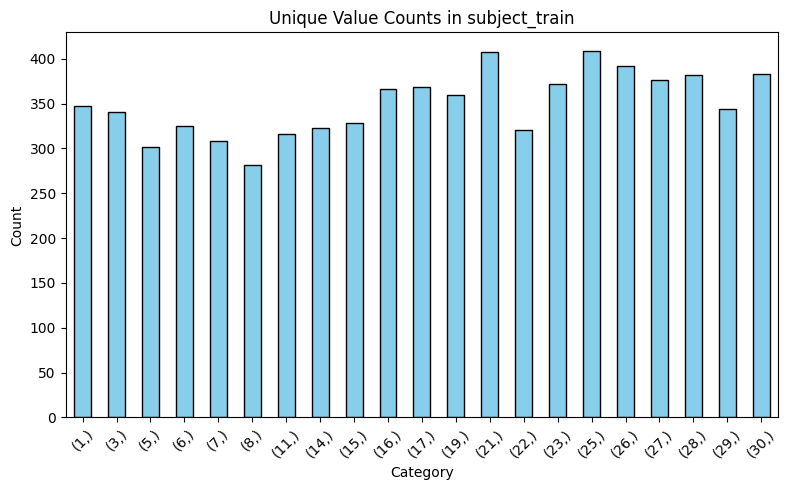

In [35]:
# Contar valores unicos en subject_train
value_counts = subject_train.value_counts()
value_counts.sort_index(inplace=True)
# print(value_counts)

# Plot
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Unique Value Counts in subject_train')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

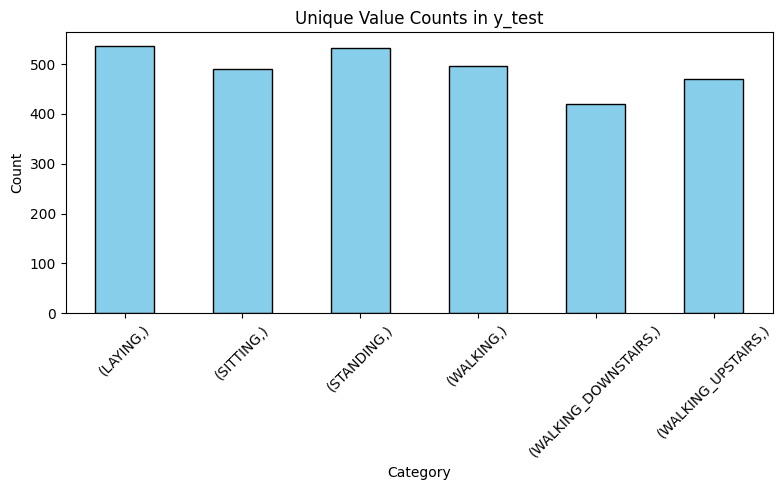

In [36]:
# Contar valores unicos en y_test
activity_map = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

y_test_names = y_test.replace(activity_map)
value_counts = y_test_names.value_counts()
value_counts.sort_index(inplace=True)
# print(value_counts)

# Plot
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Unique Value Counts in y_test')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

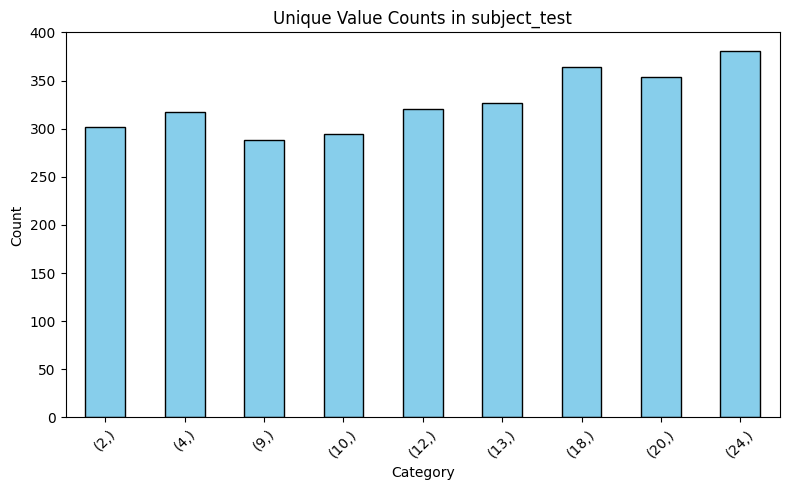

In [37]:
# Contar valores unicos en subject_test
value_counts = subject_test.value_counts()
value_counts.sort_index(inplace=True)
# print(value_counts)

# Plot
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Unique Value Counts in subject_test')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Adaptación de los datos para aplicación del paradigma Aprendizaje Multi-instancia

#### 3.1 Train data

In [38]:
# Combinar los dataframes de subject_train, y_train y X_train
train_combined = pd.concat([subject_train, y_train, X_train], axis=1)
train_combined.columns = ['Subject', 'Activity'] + list(X_train.columns)
train_combined_activity_name = train_combined.copy()
train_combined_activity_name['Activity'] = train_combined_activity_name['Activity'].replace(activity_map)
display(train_combined_activity_name.head())
display(train_combined.head())

,Subject,Activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,STANDING,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,STANDING,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,STANDING,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,STANDING,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,STANDING,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


,Subject,Activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [39]:
# Creación de las bolsas: una por subject+actividad
train_bags = []
train_bag_labels = []
train_bag_subject = []

grouped = train_combined.groupby(['Subject', 'Activity'])

for _, group in grouped:
    instances = group.drop(['Subject', 'Activity'], axis=1).values  # shape: [instances, features]
    label = group['Activity'].iloc[0]
    subject = group['Subject'].iloc[0]

    train_bags.append(instances)        # Bag = array of instances
    train_bag_labels.append(label)      # Each bag has a single label
    train_bag_subject.append(subject)   # Each bag has a single subject

multins_train = pd.DataFrame({'Bag': train_bags, 'Label': train_bag_labels, 'Subject':train_bag_subject})
multins_train_activity_name = multins_train.copy()
multins_train_activity_name['Label'] = multins_train_activity_name['Label'].replace(activity_map)
display(multins_train_activity_name.head())

,Bag,Label,Subject
0,"[[0.28202157, -0.037696218, -0.1348973, -0.328...",WALKING,1
1,"[[0.18360372, -0.076558729, -0.0469561, -0.367...",WALKING_UPSTAIRS,1
2,"[[0.35845532, 0.017975385, -0.084159118, -0.17...",WALKING_DOWNSTAIRS,1
3,"[[0.14450396, 0.18926326, 0.062769317, -0.9042...",SITTING,1
4,"[[0.28858451, -0.020294171, -0.13290514, -0.99...",STANDING,1


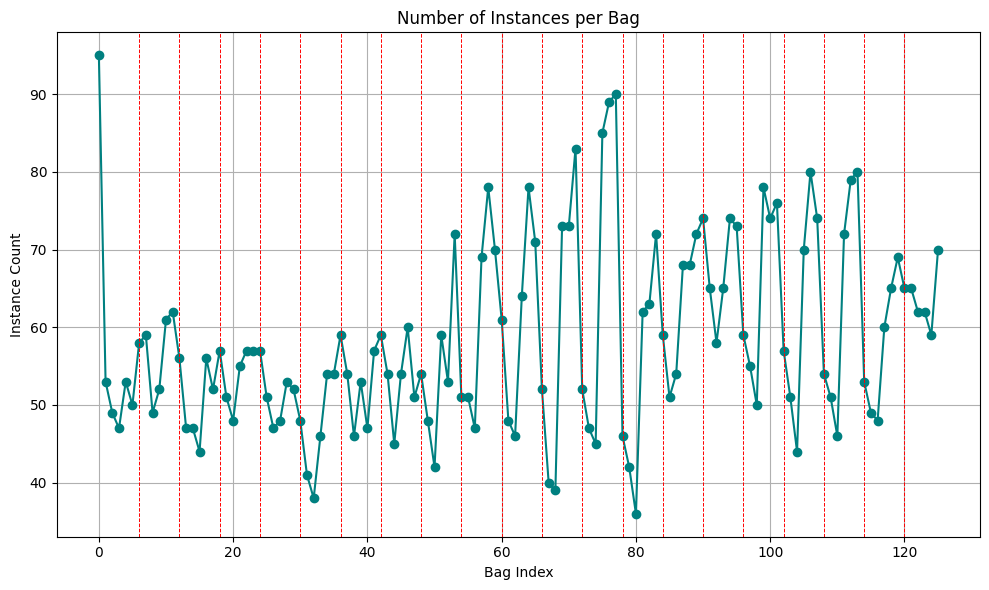

In [40]:
# Frecuencia de cada actividad por sujeto
train_bag_sizes = [len(bag) for bag in train_bags]

plt.figure(figsize=(10, 6))
plt.plot(train_bag_sizes, marker='o', linestyle='-', color='teal')
plt.title('Number of Instances per Bag')
plt.xlabel('Bag Index')
plt.ylabel('Instance Count')
plt.grid(True)

# Agregar la linea vertical cada 6 valores en el eje X
for x in range(6, len(train_bag_sizes), 6):
    plt.axvline(x=x, color='red', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

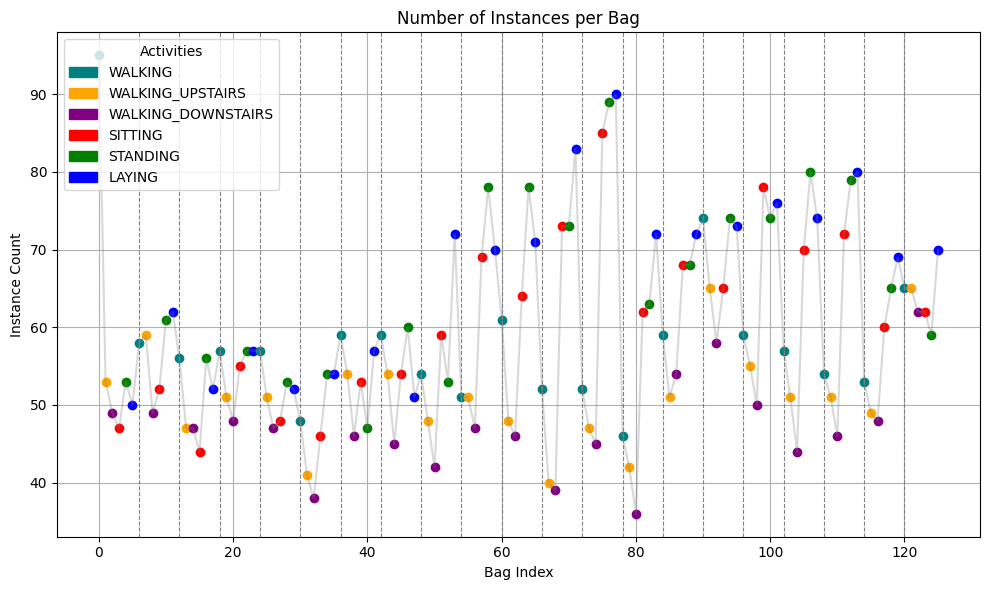

In [41]:
from matplotlib.patches import Patch

# Actividad → color mapping
activity_colors = {
    'WALKING': 'teal',
    'WALKING_UPSTAIRS': 'orange',
    'WALKING_DOWNSTAIRS': 'purple',
    'SITTING': 'red',
    'STANDING': 'green',
    'LAYING': 'blue'
}

plt.figure(figsize=(10, 6))

# Plot each bag with color based on label
for i, size in enumerate(train_bag_sizes):
    label = multins_train_activity_name['Label'][i]  # Assuming label is already a string
    color = activity_colors.get(label, 'gray')  # fallback to gray if unexpected label
    plt.plot(i, size, marker='o', color=color)

# Connect points with faint line
plt.plot(train_bag_sizes, linestyle='-', color='gray', alpha=0.3)

# Add vertical lines every 6 x-values
for x in range(6, len(train_bag_sizes), 6):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.8)

# Build legend
legend_patches = [Patch(color=color, label=activity) for activity, color in activity_colors.items()]
plt.legend(handles=legend_patches, title='Activities', loc='upper left')

plt.title('Number of Instances per Bag')
plt.xlabel('Bag Index')
plt.ylabel('Instance Count')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3.2 Test data

In [42]:
# Combinar los dataframes de subject_test, y_test y X_test
test_combined = pd.concat([subject_test, y_test, X_test], axis=1)
test_combined.columns = ['Subject', 'Activity'] + list(X_train.columns)
test_combined_activity_name = test_combined.copy()
test_combined_activity_name['Activity'] = test_combined_activity_name['Activity'].replace(activity_map)
display(test_combined_activity_name.head())
display(test_combined.head())

,Subject,Activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,2,STANDING,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,STANDING,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,STANDING,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,STANDING,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,STANDING,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


,Subject,Activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,2,5,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,5,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,5,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,5,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,5,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [43]:
# Creación de las bolsas: una por subject+actividad
test_bags = []
test_bag_labels = []
test_bag_subject = []

grouped = test_combined.groupby(['Subject', 'Activity'])

for _, group in grouped:
    instances = group.drop(['Subject', 'Activity'], axis=1).values  # shape: [instances, features]
    label = group['Activity'].iloc[0]
    subject = group['Subject'].iloc[0]

    test_bags.append(instances)        # Bag = array of instances
    test_bag_labels.append(label)      # Each bag has a single label
    test_bag_subject.append(subject)   # Each bag has a single subject

multins_test = pd.DataFrame({'Bag': test_bags, 'Label': test_bag_labels, 'Subject':test_bag_subject})
multins_test_activity_name = multins_test.copy()
multins_test_activity_name['Label'] = multins_test_activity_name['Label'].replace(activity_map)
display(multins_test_activity_name.head())

,Bag,Label,Subject
0,"[[0.20396243, -0.03234452, -0.096881229, -0.46...",WALKING,2
1,"[[0.25186651, -0.030378942, -0.3516297, -0.344...",WALKING_UPSTAIRS,2
2,"[[0.39276304, -0.059173884, -0.11092832, -0.14...",WALKING_DOWNSTAIRS,2
3,"[[0.29648714, -0.014684879, -0.13980848, -0.98...",SITTING,2
4,"[[0.25717778, -0.02328523, -0.014653762, -0.93...",STANDING,2


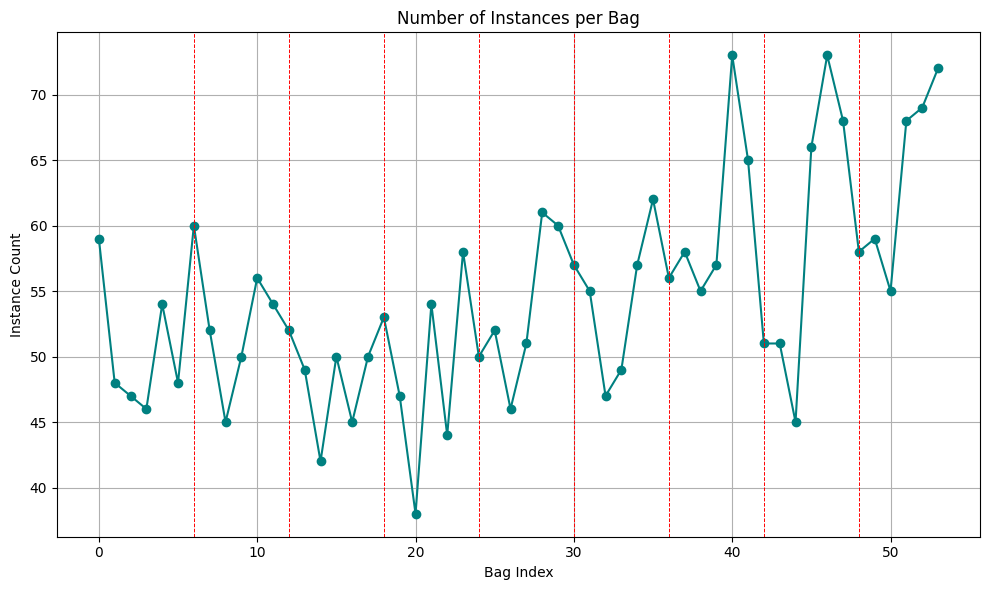

In [44]:
# Frecuencia de cada actividad por sujeto
test_bag_sizes = [len(bag) for bag in test_bags]

plt.figure(figsize=(10, 6))
plt.plot(test_bag_sizes, marker='o', linestyle='-', color='teal')
plt.title('Number of Instances per Bag')
plt.xlabel('Bag Index')
plt.ylabel('Instance Count')
plt.grid(True)

# Agregar la linea vertical cada 6 valores en el eje X
for x in range(6, len(test_bag_sizes), 6):
    plt.axvline(x=x, color='red', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

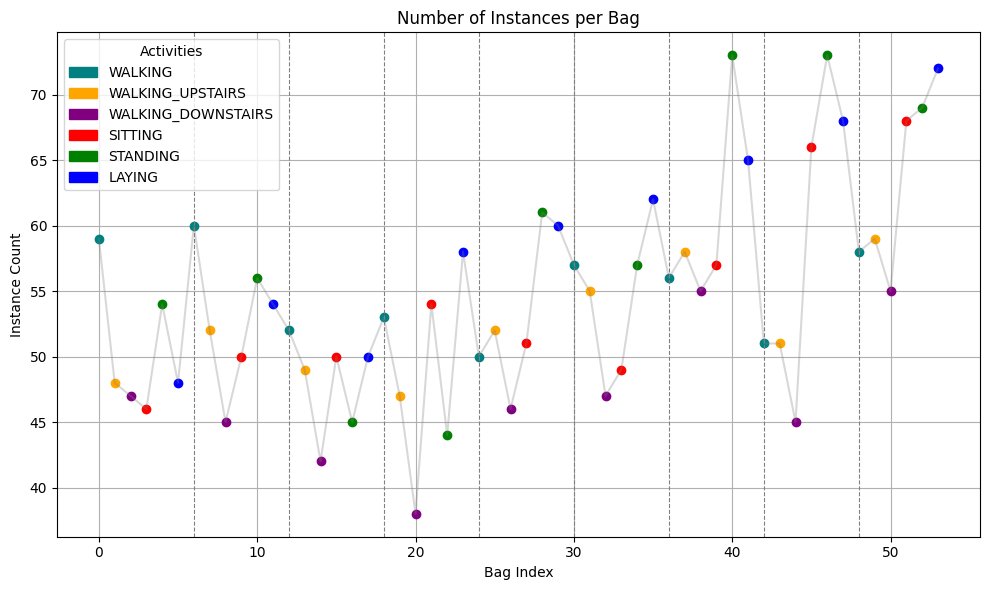

In [45]:
# Actividad → color mapping
activity_colors = {
    'WALKING': 'teal',
    'WALKING_UPSTAIRS': 'orange',
    'WALKING_DOWNSTAIRS': 'purple',
    'SITTING': 'red',
    'STANDING': 'green',
    'LAYING': 'blue'
}

plt.figure(figsize=(10, 6))

# Plot each bag with color based on label
for i, size in enumerate(test_bag_sizes):
    label = multins_test_activity_name['Label'][i]  # Assuming label is already a string
    color = activity_colors.get(label, 'gray')  # fallback to gray if unexpected label
    plt.plot(i, size, marker='o', color=color)

# Connect points with faint line
plt.plot(test_bag_sizes, linestyle='-', color='gray', alpha=0.3)

# Add vertical lines every 6 x-values
for x in range(6, len(test_bag_sizes), 6):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.8)

# Build legend
legend_patches = [Patch(color=color, label=activity) for activity, color in activity_colors.items()]
plt.legend(handles=legend_patches, title='Activities', loc='upper left')

plt.title('Number of Instances per Bag')
plt.xlabel('Bag Index')
plt.ylabel('Instance Count')
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Experimentacion de los modelos
Regresión logística multiclase, KNN, Random forest, Red neuronal, SVC

#### 4.1 Regresión Logística Multiclase en paradigma de apredizaje multi instancia

In [46]:
def logisticMIL_split(
    train_bags, train_labels, test_bags, test_labels,
    regs, max_iters, solvers
):
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, f1_score

    resultados = pd.DataFrame(columns=[
        'solver','C', 'max_iter', 'train_accuracy', 'train_f1_macro',
        'test_accuracy', 'test_f1_macro'
    ])
    idx = 0

    # Encode class labels
    le = LabelEncoder()
    train_labels_encoded = le.fit_transform(train_labels)
    test_labels_encoded = le.transform(test_labels)

    # Shuffle train set in synchronized order
    np.random.seed(np.random.randint(100))
    train_indices = np.random.permutation(len(train_bags))
    train_bags = [train_bags[i] for i in train_indices]
    train_labels_encoded = [train_labels_encoded[i] for i in train_indices]

    # Shuffle test set in synchronized order
    np.random.seed(np.random.randint(100))
    test_indices = np.random.permutation(len(test_bags))
    test_bags = [test_bags[i] for i in test_indices]
    test_labels_encoded = [test_labels_encoded[i] for i in test_indices]

    for solver_val in solvers:
        for C_val in regs:
            for iter_val in max_iters:
                print(f"[Logistic] Solver={solver_val}, C={C_val}, max_iter={iter_val}")

                # Prepare training instances
                X_train = np.vstack(train_bags)
                y_train = np.concatenate([[label]*len(bag) for bag, label in zip(train_bags, train_labels_encoded)])

                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)

                model = LogisticRegression(C=C_val, solver=solver_val, max_iter=iter_val)
                model.fit(X_train_scaled, y_train)

                # Evaluate on training set
                y_train_pred = model.predict(X_train_scaled)
                train_acc = accuracy_score(y_train, y_train_pred)
                train_f1 = f1_score(y_train, y_train_pred, average='macro')

                # Evaluate on test set (using sampling)
                y_pred_bags = []
                for bag in test_bags:
                    bag_scaled = scaler.transform(bag)
                    proba = model.predict_proba(bag_scaled)
                    avg_proba = proba.mean(axis=0)

                    # Sample predicted class based on probabilities
                    pred = np.argmax(avg_proba)
                    y_pred_bags.append(pred)

                test_acc = accuracy_score(test_labels_encoded, y_pred_bags)
                test_f1 = f1_score(test_labels_encoded, y_pred_bags, average='macro')

                resultados.loc[idx] = {
                    'solver': solver_val,
                    'C': C_val,
                    'max_iter': iter_val,
                    'train_accuracy': train_acc,
                    'train_f1_macro': train_f1,
                    'test_accuracy': test_acc,
                    'test_f1_macro': test_f1
                }
                idx += 1

    return resultados

In [ ]:
solvers = ['lbfgs','newton-cg','newton-cholesky']
regs = [10,1,0.1,0.01,0.001]
max_iters = [500,1000,3000,5000]
resultados_RLMIL = logisticMIL_split(train_bags, train_bag_labels, test_bags, test_bag_labels, regs, max_iters, solvers = solvers)

[Logistic] Solver=lbfgs, C=10, max_iter=500
[Logistic] Solver=lbfgs, C=10, max_iter=1000
[Logistic] Solver=lbfgs, C=10, max_iter=3000
[Logistic] Solver=lbfgs, C=10, max_iter=5000
[Logistic] Solver=lbfgs, C=1, max_iter=500
[Logistic] Solver=lbfgs, C=1, max_iter=1000
[Logistic] Solver=lbfgs, C=1, max_iter=3000
[Logistic] Solver=lbfgs, C=1, max_iter=5000
[Logistic] Solver=lbfgs, C=0.1, max_iter=500
[Logistic] Solver=lbfgs, C=0.1, max_iter=1000
[Logistic] Solver=lbfgs, C=0.1, max_iter=3000
[Logistic] Solver=lbfgs, C=0.1, max_iter=5000
[Logistic] Solver=lbfgs, C=0.01, max_iter=500
[Logistic] Solver=lbfgs, C=0.01, max_iter=1000
[Logistic] Solver=lbfgs, C=0.01, max_iter=3000
[Logistic] Solver=lbfgs, C=0.01, max_iter=5000
[Logistic] Solver=lbfgs, C=0.001, max_iter=500
[Logistic] Solver=lbfgs, C=0.001, max_iter=1000
[Logistic] Solver=lbfgs, C=0.001, max_iter=3000
[Logistic] Solver=lbfgs, C=0.001, max_iter=5000
[Logistic] Solver=newton-cg, C=10, max_iter=500
[Logistic] Solver=newton-cg, C=10, ma

In [ ]:
resultados_RLMIL.sort_values(by = ['test_accuracy','test_f1_macro', 'C'], ascending = False)

,solver,C,max_iter,train_accuracy,train_f1_macro,test_accuracy,test_f1_macro
0,lbfgs,10.000,500,0.999184,0.999247,1.0,1.0
1,lbfgs,10.000,1000,0.999184,0.999247,1.0,1.0
2,lbfgs,10.000,3000,0.999184,0.999247,1.0,1.0
3,lbfgs,10.000,5000,0.999184,0.999247,1.0,1.0
20,newton-cg,10.000,500,0.999184,0.999247,1.0,1.0
21,newton-cg,10.000,1000,0.999184,0.999247,1.0,1.0
22,newton-cg,10.000,3000,0.999184,0.999247,1.0,1.0
23,newton-cg,10.000,5000,0.999184,0.999247,1.0,1.0
40,newton-cholesky,10.000,500,0.999184,0.999247,1.0,1.0
41,newton-cholesky,10.000,1000,0.999184,0.999247,1.0,1.0


In [47]:
def add_noise_to_bags(bags, noise_level=0.1, random_state=42):
    """
    Adds Gaussian noise to each instance in each bag.

    bags: List of np.ndarray (each [instances × features])
    noise_level: float, standard deviation of the noise
    Returns: List of noisy bags
    """
    import numpy as np
    np.random.seed(random_state)

    noisy_bags = []
    for bag in bags:
        noise = np.random.normal(loc=0.0, scale=noise_level, size=bag.shape)
        noisy_bag = bag + noise
        noisy_bags.append(noisy_bag)

    return noisy_bags

In [ ]:
solvers = ['lbfgs','newton-cg','newton-cholesky']
regs = [10,1,0.1,0.01,0.001]
max_iters = [500,1000, 3000, 5000]
noisy_test_bags = add_noise_to_bags(test_bags, noise_level=1.5)
resultados_RLMIL = logisticMIL_split(train_bags, train_bag_labels, noisy_test_bags, test_bag_labels, regs, max_iters, solvers)

[Logistic] Solver=lbfgs, C=10, max_iter=500
[Logistic] Solver=lbfgs, C=10, max_iter=1000
[Logistic] Solver=lbfgs, C=10, max_iter=3000
[Logistic] Solver=lbfgs, C=10, max_iter=5000
[Logistic] Solver=lbfgs, C=1, max_iter=500
[Logistic] Solver=lbfgs, C=1, max_iter=1000
[Logistic] Solver=lbfgs, C=1, max_iter=3000
[Logistic] Solver=lbfgs, C=1, max_iter=5000
[Logistic] Solver=lbfgs, C=0.1, max_iter=500
[Logistic] Solver=lbfgs, C=0.1, max_iter=1000
[Logistic] Solver=lbfgs, C=0.1, max_iter=3000
[Logistic] Solver=lbfgs, C=0.1, max_iter=5000
[Logistic] Solver=lbfgs, C=0.01, max_iter=500
[Logistic] Solver=lbfgs, C=0.01, max_iter=1000
[Logistic] Solver=lbfgs, C=0.01, max_iter=3000
[Logistic] Solver=lbfgs, C=0.01, max_iter=5000
[Logistic] Solver=lbfgs, C=0.001, max_iter=500
[Logistic] Solver=lbfgs, C=0.001, max_iter=1000
[Logistic] Solver=lbfgs, C=0.001, max_iter=3000
[Logistic] Solver=lbfgs, C=0.001, max_iter=5000
[Logistic] Solver=newton-cg, C=10, max_iter=500
[Logistic] Solver=newton-cg, C=10, ma

In [ ]:
resultados_RLMIL.sort_values(by = ['test_accuracy','test_f1_macro', 'C'], ascending = False)

,solver,C,max_iter,train_accuracy,train_f1_macro,test_accuracy,test_f1_macro
16,lbfgs,0.001,500,0.961915,0.963287,0.907407,0.907178
17,lbfgs,0.001,1000,0.961915,0.963287,0.907407,0.907178
18,lbfgs,0.001,3000,0.961915,0.963287,0.907407,0.907178
19,lbfgs,0.001,5000,0.961915,0.963287,0.907407,0.907178
36,newton-cg,0.001,500,0.962051,0.963415,0.907407,0.907178
37,newton-cg,0.001,1000,0.962051,0.963415,0.907407,0.907178
38,newton-cg,0.001,3000,0.962051,0.963415,0.907407,0.907178
39,newton-cg,0.001,5000,0.962051,0.963415,0.907407,0.907178
56,newton-cholesky,0.001,500,0.962051,0.963415,0.907407,0.907178
57,newton-cholesky,0.001,1000,0.962051,0.963415,0.907407,0.907178


#### 4.2 KNN

In [ ]:
def knnMIL_experiment(
    train_bags, train_bag_labels, test_bags, test_labels,
    k_values, dist_metrics
):
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score, f1_score

    resultados = pd.DataFrame(columns=['k','dist_metric', 'train_accuracy', 'train_f1_score',
                                       'test_accuracy', 'test_f1_score'])
    idx = 0

    # Shuffle train set
    np.random.seed(np.random.randint(100))
    train_indices = np.random.permutation(len(train_bags))
    train_bags = [train_bags[i] for i in train_indices]
    train_bag_labels = [train_bag_labels[i] for i in train_indices]

    # Shuffle test set
    np.random.seed(np.random.randint(100))
    test_indices = np.random.permutation(len(test_bags))
    test_bags = [test_bags[i] for i in test_indices]
    test_labels = [test_labels[i] for i in test_indices]

    for dist_metric in dist_metrics:
      for k in k_values:
          print(f"[KNN] Fitting with metric={dist_metric}, k={k}")

          # Instance-level training data
          X_train = np.vstack(train_bags)
          y_train = np.concatenate([[label]*len(bag) for bag, label in zip(train_bags, train_bag_labels)])

          scaler = StandardScaler()
          X_train_scaled = scaler.fit_transform(X_train)

          knn = KNeighborsClassifier(n_neighbors=k)
          knn.fit(X_train_scaled, y_train)

          # Train performance
          y_train_pred = knn.predict(X_train_scaled)
          train_acc = accuracy_score(y_train, y_train_pred)
          train_f1 = f1_score(y_train, y_train_pred, average='macro')

          # Predict per test bag via majority voting
          y_pred_bags = []
          for bag in test_bags:
              X_test_scaled = scaler.transform(bag)
              preds = knn.predict(X_test_scaled)
              majority = np.bincount(preds).argmax()
              y_pred_bags.append(majority)

          test_acc = accuracy_score(test_labels, y_pred_bags)
          test_f1 = f1_score(test_labels, y_pred_bags, average='macro')

          resultados.loc[idx] = {
              'k': k,
              'dist_metric': dist_metric,
              'train_accuracy': train_acc,
              'train_f1_score': train_f1,
              'test_accuracy': test_acc,
              'test_f1_score': test_f1
          }
          idx += 1

    return resultados

In [ ]:
ks = [5,10,15,20,25,30,35,40,45,50]
dist_metrics = ['euclidean','manhattan', 'haversine', 'cosine']
resultados_knnMIL = knnMIL_experiment(
    train_bags, train_bag_labels, test_bags, test_bag_labels,
    ks, dist_metrics
)

[KNN] Fitting with metric=euclidean, k=5
[KNN] Fitting with metric=euclidean, k=10
[KNN] Fitting with metric=euclidean, k=15
[KNN] Fitting with metric=euclidean, k=20
[KNN] Fitting with metric=euclidean, k=25
[KNN] Fitting with metric=euclidean, k=30
[KNN] Fitting with metric=euclidean, k=35
[KNN] Fitting with metric=euclidean, k=40
[KNN] Fitting with metric=euclidean, k=45
[KNN] Fitting with metric=euclidean, k=50
[KNN] Fitting with metric=manhattan, k=5
[KNN] Fitting with metric=manhattan, k=10
[KNN] Fitting with metric=manhattan, k=15
[KNN] Fitting with metric=manhattan, k=20
[KNN] Fitting with metric=manhattan, k=25
[KNN] Fitting with metric=manhattan, k=30
[KNN] Fitting with metric=manhattan, k=35
[KNN] Fitting with metric=manhattan, k=40
[KNN] Fitting with metric=manhattan, k=45
[KNN] Fitting with metric=manhattan, k=50
[KNN] Fitting with metric=haversine, k=5
[KNN] Fitting with metric=haversine, k=10
[KNN] Fitting with metric=haversine, k=15
[KNN] Fitting with metric=haversine, 

In [ ]:
resultados_knnMIL.sort_values(by = ['test_accuracy','test_f1_score'], ascending = False)

,k,dist_metric,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,5,euclidean,0.982862,0.983733,0.981481,0.981424
1,10,euclidean,0.975245,0.976341,0.981481,0.981424
2,15,euclidean,0.967764,0.969114,0.981481,0.981424
3,20,euclidean,0.964227,0.965420,0.981481,0.981424
4,25,euclidean,0.958515,0.959683,0.981481,0.981424
5,30,euclidean,0.956202,0.957438,0.981481,0.981424
6,35,euclidean,0.950762,0.952054,0.981481,0.981424
7,40,euclidean,0.949402,0.950824,0.981481,0.981424
8,45,euclidean,0.944913,0.946597,0.981481,0.981424
10,5,manhattan,0.982862,0.983733,0.981481,0.981424


In [ ]:
noisy_test_bags = add_noise_to_bags(test_bags, noise_level=1.5)
ks = [5,10,15,20,25,30,35,40,45,50]
dist_metrics = ['euclidean','manhattan', 'haversine', 'cosine']
resultados_knnMIL = knnMIL_experiment(
    train_bags, train_bag_labels, noisy_test_bags, test_bag_labels,
    ks, dist_metrics
)

[KNN] Fitting with metric=euclidean, k=5
[KNN] Fitting with metric=euclidean, k=10
[KNN] Fitting with metric=euclidean, k=15
[KNN] Fitting with metric=euclidean, k=20
[KNN] Fitting with metric=euclidean, k=25
[KNN] Fitting with metric=euclidean, k=30
[KNN] Fitting with metric=euclidean, k=35
[KNN] Fitting with metric=euclidean, k=40
[KNN] Fitting with metric=euclidean, k=45
[KNN] Fitting with metric=euclidean, k=50
[KNN] Fitting with metric=manhattan, k=5
[KNN] Fitting with metric=manhattan, k=10
[KNN] Fitting with metric=manhattan, k=15
[KNN] Fitting with metric=manhattan, k=20
[KNN] Fitting with metric=manhattan, k=25
[KNN] Fitting with metric=manhattan, k=30
[KNN] Fitting with metric=manhattan, k=35
[KNN] Fitting with metric=manhattan, k=40
[KNN] Fitting with metric=manhattan, k=45
[KNN] Fitting with metric=manhattan, k=50
[KNN] Fitting with metric=haversine, k=5
[KNN] Fitting with metric=haversine, k=10
[KNN] Fitting with metric=haversine, k=15
[KNN] Fitting with metric=haversine, 

In [ ]:
resultados_knnMIL.sort_values(by = ['test_accuracy','test_f1_score'], ascending = False)

,k,dist_metric,train_accuracy,train_f1_score,test_accuracy,test_f1_score
6,35,euclidean,0.950762,0.952054,0.944444,0.943047
16,35,manhattan,0.950762,0.952054,0.944444,0.943047
26,35,haversine,0.950762,0.952054,0.944444,0.943047
36,35,cosine,0.950762,0.952054,0.944444,0.943047
7,40,euclidean,0.949402,0.950824,0.907407,0.906944
9,50,euclidean,0.942465,0.943937,0.907407,0.906944
17,40,manhattan,0.949402,0.950824,0.907407,0.906944
19,50,manhattan,0.942465,0.943937,0.907407,0.906944
27,40,haversine,0.949402,0.950824,0.907407,0.906944
29,50,haversine,0.942465,0.943937,0.907407,0.906944


#### 4.3 Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

class MILRandomForestMulti:
    def __init__(self,
                 n_estimators=100,
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 aggregation='max'):
        self.model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=9
        )
        self.aggregation = aggregation

    def fit(self, bags, bag_labels):
        instances = np.vstack(bags)
        instance_labels = np.repeat(bag_labels, [len(bag) for bag in bags])
        self.model.fit(instances, instance_labels)


    def predict(self, bags):
        bag_predictions = []
        for bag in bags:
            instance_probs = self.model.predict_proba(bag)
            if self.aggregation == 'max':
                bag_probs = instance_probs.max(axis=0)
            elif self.aggregation == 'mean':
                bag_probs = instance_probs.mean(axis=0)
            else:
                raise ValueError("Unsupported aggregation method")
            bag_pred = np.argmax(bag_probs)
            bag_predictions.append(bag_pred)
        return np.array(bag_predictions)

    def evaluate(self, test_bags, test_labels):
        preds = self.predict(test_bags)

        test_acc = accuracy_score(test_labels, preds)
        test_f1_score = f1_score(test_labels, preds, average='macro')
        return test_acc, test_f1_score

In [ ]:
def experimentar_rfMIL(train_bags, train_bag_labels, test_bags, test_bag_labels,
                       n_estimators_list, max_depth_list,
                       min_samples_split_list, min_samples_leaf_list,
                       aggregations=['max']):
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.metrics import accuracy_score, f1_score
    from collections import Counter

    resultados = pd.DataFrame(columns=[
        'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
        'aggregation', 'train_accuracy', 'train_f1_score',
        'test_accuracy', 'test_f1_score'
    ])

    # Encode labels
    le = LabelEncoder()
    train_labels_encoded = le.fit_transform(train_bag_labels)
    test_labels_encoded = le.transform(test_bag_labels)

    # Shuffle train and test sets
    rng = np.random.default_rng(seed=42)
    train_idx = rng.permutation(len(train_bags))
    test_idx = rng.permutation(len(test_bags))

    train_bags = [train_bags[i] for i in train_idx]
    train_labels_encoded = [train_labels_encoded[i] for i in train_idx]
    test_bags = [test_bags[i] for i in test_idx]
    test_labels_encoded = [test_labels_encoded[i] for i in test_idx]

    # Normalize each instance bag-wise
    scaler = StandardScaler()
    all_instances = np.vstack(train_bags)
    scaler.fit(all_instances)

    train_bags_scaled = [scaler.transform(bag) for bag in train_bags]
    test_bags_scaled = [scaler.transform(bag) for bag in test_bags]

    idx = 0
    for aggregation in aggregations:
        for n in n_estimators_list:
            for d in max_depth_list:
                for split in min_samples_split_list:
                    for leaf in min_samples_leaf_list:
                        print(f"[RF MIL] aggregation={aggregation}, n_estimators={n}, max_depth={d}, min_samples_split={split}, min_samples_leaf={leaf}")

                        model = MILRandomForestMulti(
                            n_estimators=n,
                            max_depth=d,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            aggregation=aggregation
                        )

                        # Fit on bag-level training data
                        model.fit(train_bags_scaled, train_labels_encoded)

                        # Train set evaluation
                        train_preds = model.predict(train_bags_scaled)
                        train_acc = accuracy_score(train_labels_encoded, train_preds)
                        train_f1 = f1_score(train_labels_encoded, train_preds, average='macro', zero_division=0)

                        # Test set evaluation
                        test_preds = model.predict(test_bags_scaled)
                        test_acc = accuracy_score(test_labels_encoded, test_preds)
                        test_f1 = f1_score(test_labels_encoded, test_preds, average='macro', zero_division=0)

                        # Store results
                        resultados.loc[idx] = {
                            'n_estimators': n,
                            'max_depth': d,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf,
                            'aggregation': aggregation,
                            'train_accuracy': train_acc,
                            'train_f1_score': train_f1,
                            'test_accuracy': test_acc,
                            'test_f1_score': test_f1
                        }
                        idx += 1

    return resultados

In [ ]:
n_estimators_list = [50, 100, 200]
max_depth_list = [5, 10, None]
min_samples_split_list = [2,10,20]
min_samples_leaf_list = [1,5,10]
aggregations = ['max', 'mean']
resultados_rfMIL = experimentar_rfMIL(train_bags, train_bag_labels, test_bags, test_bag_labels,
                        n_estimators_list, max_depth_list,
                        min_samples_split_list, min_samples_leaf_list, aggregations)

[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=1
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=5
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=10
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=1
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=20, min_samples_leaf=1
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=20, min_samples_leaf=5
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=20, min_samples_leaf=10
[RF MIL] aggregation=max, n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1
[RF MIL] aggregation=max, n_es

In [ ]:
resultados_rfMIL.sort_values(by = ['test_accuracy','test_f1_score'], ascending = False)

,n_estimators,max_depth,min_samples_split,min_samples_leaf,aggregation,train_accuracy,train_f1_score,test_accuracy,test_f1_score
9,50,10,2,1,max,1.000000,1.000000,0.981481,0.981424
10,50,10,2,5,max,1.000000,1.000000,0.981481,0.981424
11,50,10,2,10,max,1.000000,1.000000,0.981481,0.981424
12,50,10,10,1,max,1.000000,1.000000,0.981481,0.981424
13,50,10,10,5,max,1.000000,1.000000,0.981481,0.981424
...,...,...,...,...,...,...,...,...,...
87,50,5,20,1,mean,0.992063,0.992059,0.962963,0.962848
88,50,5,20,5,mean,0.992063,0.992059,0.962963,0.962848
89,50,5,20,10,mean,0.992063,0.992059,0.962963,0.962848
15,50,10,20,1,max,1.000000,1.000000,0.962963,0.962848


In [ ]:
noisy_test_bags = add_noise_to_bags(test_bags, noise_level=1.5)
n_estimators_list = [50, 100, 200]
max_depth_list = [5, 10, None]
min_samples_split_list = [2,10,20]
min_samples_leaf_list = [1,5,10]
aggregations = ['max', 'mean']
resultados_rfMIL = experimentar_rfMIL(train_bags, train_bag_labels, noisy_test_bags, test_bag_labels,
                        n_estimators_list, max_depth_list,
                        min_samples_split_list, min_samples_leaf_list, aggregations)

[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=1
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=5
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=10
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=1
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=20, min_samples_leaf=1
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=20, min_samples_leaf=5
[RF MIL] aggregation=max, n_estimators=50, max_depth=5, min_samples_split=20, min_samples_leaf=10
[RF MIL] aggregation=max, n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1
[RF MIL] aggregation=max, n_es

In [ ]:
resultados_rfMIL.sort_values(by = ['test_accuracy','test_f1_score'], ascending = False)

,n_estimators,max_depth,min_samples_split,min_samples_leaf,aggregation,train_accuracy,train_f1_score,test_accuracy,test_f1_score
108,100,5,2,1,mean,0.984127,0.984118,0.555556,0.470876
92,50,10,2,10,mean,1.000000,1.000000,0.555556,0.456773
95,50,10,10,10,mean,1.000000,1.000000,0.555556,0.456773
98,50,10,20,10,mean,1.000000,1.000000,0.555556,0.456773
119,100,10,2,10,mean,1.000000,1.000000,0.555556,0.456773
...,...,...,...,...,...,...,...,...,...
66,200,10,10,1,max,1.000000,1.000000,0.185185,0.076212
69,200,10,20,1,max,1.000000,1.000000,0.185185,0.074854
78,200,None,20,1,max,1.000000,1.000000,0.185185,0.074854
39,100,10,10,1,max,1.000000,1.000000,0.166667,0.056604


#### 4.4. Red Neuronal

In [48]:
# ejercicio de código
def experimentar_mlpc(train_bags,train_bag_labels,test_bags,test_bag_labels, num_hidden_layers, num_neurons):
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import accuracy_score, f1_score

    #Validamos el modelo
    resultados = pd.DataFrame()
    idx = 0
    Acc = np.zeros(len(num_hidden_layers) * len(num_neurons))

    resultados = pd.DataFrame(columns=['# Capas Ocultas','# Neuronas por capa', 'train_accuracy', 'train_f1_score',
                                       'test_accuracy', 'test_f1_score'])
    # Shuffle train set
    np.random.seed(np.random.randint(100))
    train_indices = np.random.permutation(len(train_bags))
    train_bags = [train_bags[i] for i in train_indices]
    train_bag_labels = [train_bag_labels[i] for i in train_indices]

    # Shuffle test set
    np.random.seed(np.random.randint(100))
    test_indices = np.random.permutation(len(test_bags))
    test_bags = [test_bags[i] for i in test_indices]
    test_labels = [test_bag_labels[i] for i in test_indices]

    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            print(f"[MLP] Fitting with # layers ={hidden_layers}, neurons per layers={neurons}")

            # Instance-level training data
            X_train = np.vstack(train_bags)
            y_train = np.concatenate([[label]*len(bag) for bag, label in zip(train_bags, train_bag_labels)])

            #Normalizamos los datos
            scaler = StandardScaler().fit(X_train)
            X_train = scaler.fit_transform(X_train)

            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            #Ajuste la semilla del modelo a 1 para garantizar la reproducibilidad de los resultados.
            hidden_layer_sizes = tuple([neurons],)*hidden_layers
            mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=350, random_state=9, alpha=0.01)
            # entrenar el MLP
            mlp.fit(X_train,y_train)

            # Evaluate on training set
            y_train_pred = mlp.predict(X_train)
            train_acc = accuracy_score(y_train, y_train_pred)
            train_f1 = f1_score(y_train, y_train_pred, average='macro')

            # Majority Voting for bag prediction
            y_pred_bags = []
            for bag in test_bags:
                bag_scaled = scaler.transform(bag)
                instance_preds = mlp.predict(bag_scaled)             # Get predictions for all instances in the bag
                pred = np.bincount(instance_preds).argmax()          # Choose the most frequent label
                y_pred_bags.append(pred)


            test_acc = accuracy_score(test_labels, y_pred_bags)
            test_f1 = f1_score(test_labels, y_pred_bags, average='macro')

            resultados.loc[idx] = {
                '# Capas Ocultas': hidden_layers,
                '# Neuronas por capa': neurons,
                'train_accuracy': train_acc,
                'train_f1_score': train_f1,
                'test_accuracy': test_acc,
                'test_f1_score': test_f1
            }
            idx+=1

    return (resultados)

In [ ]:
num_hidden_layers = [1, 2, 3]
num_neurons = [4, 12, 32, 64, 128, 256]
resultados_mlpMIL = experimentar_mlpc(train_bags,train_bag_labels,test_bags,test_bag_labels, num_hidden_layers, num_neurons)

[MLP] Fitting with # layers =1, neurons per layers=4
[MLP] Fitting with # layers =1, neurons per layers=12
[MLP] Fitting with # layers =1, neurons per layers=32
[MLP] Fitting with # layers =1, neurons per layers=64
[MLP] Fitting with # layers =1, neurons per layers=128
[MLP] Fitting with # layers =2, neurons per layers=4
[MLP] Fitting with # layers =2, neurons per layers=12
[MLP] Fitting with # layers =2, neurons per layers=32
[MLP] Fitting with # layers =2, neurons per layers=64
[MLP] Fitting with # layers =2, neurons per layers=128
[MLP] Fitting with # layers =3, neurons per layers=4
[MLP] Fitting with # layers =3, neurons per layers=12
[MLP] Fitting with # layers =3, neurons per layers=32
[MLP] Fitting with # layers =3, neurons per layers=64
[MLP] Fitting with # layers =3, neurons per layers=128


In [ ]:
resultados_mlpMIL.sort_values(by = ['test_accuracy','test_f1_score'], ascending = False)

,# Capas Ocultas,# Neuronas por capa,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,1,4,0.994967,0.995357,1.000000,1.000000
1,1,12,1.000000,1.000000,1.000000,1.000000
2,1,32,1.000000,1.000000,1.000000,1.000000
3,1,64,1.000000,1.000000,1.000000,1.000000
4,1,128,1.000000,1.000000,1.000000,1.000000
6,2,12,0.998232,0.998337,1.000000,1.000000
7,2,32,1.000000,1.000000,1.000000,1.000000
8,2,64,1.000000,1.000000,1.000000,1.000000
9,2,128,1.000000,1.000000,1.000000,1.000000
10,3,4,0.995103,0.995488,1.000000,1.000000


In [49]:
noisy_test_bags = add_noise_to_bags(test_bags, noise_level=1.5)
num_hidden_layers = [1, 2, 3]
num_neurons = [4, 12, 32, 64, 128, 256]
resultados_mlpMIL = experimentar_mlpc(train_bags,train_bag_labels,noisy_test_bags,test_bag_labels, num_hidden_layers, num_neurons)

[MLP] Fitting with # layers =1, neurons per layers=4
[MLP] Fitting with # layers =1, neurons per layers=12
[MLP] Fitting with # layers =1, neurons per layers=32
[MLP] Fitting with # layers =1, neurons per layers=64
[MLP] Fitting with # layers =1, neurons per layers=128
[MLP] Fitting with # layers =1, neurons per layers=256
[MLP] Fitting with # layers =2, neurons per layers=4
[MLP] Fitting with # layers =2, neurons per layers=12
[MLP] Fitting with # layers =2, neurons per layers=32
[MLP] Fitting with # layers =2, neurons per layers=64
[MLP] Fitting with # layers =2, neurons per layers=128
[MLP] Fitting with # layers =2, neurons per layers=256
[MLP] Fitting with # layers =3, neurons per layers=4
[MLP] Fitting with # layers =3, neurons per layers=12
[MLP] Fitting with # layers =3, neurons per layers=32
[MLP] Fitting with # layers =3, neurons per layers=64
[MLP] Fitting with # layers =3, neurons per layers=128
[MLP] Fitting with # layers =3, neurons per layers=256


In [50]:
resultados_mlpMIL.sort_values(by = ['test_accuracy','test_f1_score'], ascending = False)

,# Capas Ocultas,# Neuronas por capa,train_accuracy,train_f1_score,test_accuracy,test_f1_score
5,1,256,1.000000,1.000000,0.833333,0.829240
4,1,128,1.000000,1.000000,0.833333,0.820683
7,2,12,1.000000,1.000000,0.814815,0.812470
3,1,64,1.000000,1.000000,0.740741,0.755560
1,1,12,1.000000,1.000000,0.740741,0.731435
10,2,128,1.000000,1.000000,0.722222,0.679894
9,2,64,1.000000,1.000000,0.703704,0.653362
15,3,64,1.000000,1.000000,0.685185,0.652759
14,3,32,1.000000,1.000000,0.685185,0.638004
17,3,256,0.991159,0.991854,0.685185,0.611111


#### 4.5 SVM

In [ ]:
def svmMIL_experiment(
    train_bags, train_labels, test_bags, test_labels,
    regs, kernels, max_iters
):
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, f1_score

    resultados = pd.DataFrame(columns=[
        'kernel', 'C', 'max_iter', 'train_accuracy', 'train_f1_macro',
        'test_accuracy', 'test_f1_macro'
    ])
    idx = 0

    # Encode class labels
    le = LabelEncoder()
    train_labels_encoded = le.fit_transform(train_labels)
    test_labels_encoded = le.transform(test_labels)

    # Shuffle train and test sets
    np.random.seed(np.random.randint(100))
    train_indices = np.random.permutation(len(train_bags))
    train_bags = [train_bags[i] for i in train_indices]
    train_labels_encoded = [train_labels_encoded[i] for i in train_indices]

    test_indices = np.random.permutation(len(test_bags))
    test_bags = [test_bags[i] for i in test_indices]
    test_labels_encoded = [test_labels_encoded[i] for i in test_indices]

    for kernel in kernels:
        for C_val in regs:
            for iter_val in max_iters:
                print(f"[SVM] Kernel={kernel}, C={C_val}, max_iter={iter_val}")

                # Flatten bags to instances for training
                X_train = np.vstack(train_bags)
                y_train = np.concatenate([
                    [label]*len(bag) for bag, label in zip(train_bags, train_labels_encoded)
                ])

                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)

                model = SVC(
                    C=C_val, kernel=kernel, max_iter=iter_val,
                    probability=True, decision_function_shape='ovr'
                )
                model.fit(X_train_scaled, y_train)

                # Training evaluation
                y_train_pred = model.predict(X_train_scaled)
                train_acc = accuracy_score(y_train, y_train_pred)
                train_f1 = f1_score(y_train, y_train_pred, average='macro')

                # Bag-level prediction for test set
                y_pred_bags = []
                for bag in test_bags:
                    bag_scaled = scaler.transform(bag)
                    proba = model.predict_proba(bag_scaled)
                    avg_proba = proba.mean(axis=0)
                    pred = np.argmax(avg_proba)
                    y_pred_bags.append(pred)

                test_acc = accuracy_score(test_labels_encoded, y_pred_bags)
                test_f1 = f1_score(test_labels_encoded, y_pred_bags, average='macro')

                resultados.loc[idx] = {
                    'kernel': kernel,
                    'C': C_val,
                    'max_iter': iter_val,
                    'train_accuracy': train_acc,
                    'train_f1_macro': train_f1,
                    'test_accuracy': test_acc,
                    'test_f1_macro': test_f1
                }
                idx += 1

    return resultados

In [ ]:
kernels = ['linear','rbf']
regs = [10,1,0.1,0.01,0.001]
max_iters = [500,1000,3000,5000]
resultados_svmMIL = svmMIL_experiment(
    train_bags, train_bag_labels, test_bags, test_bag_labels,
    regs, kernels, max_iters
)

[SVM] Kernel=linear, C=10, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=10, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=10, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=10, max_iter=5000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=5000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=5000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=5000
[SVM] Kernel=linear, C=0.001, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.001, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.001, max_iter=3000
[SVM] Kernel=linear, C=0.001, max_iter=5000
[SVM] Kernel=rbf, C=10, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=10, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=10, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=10, max_iter=5000
[SVM] Kernel=rbf, C=1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=1, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=1, max_iter=3000
[SVM] Kernel=rbf, C=1, max_iter=5000
[SVM] Kernel=rbf, C=0.1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.1, max_iter=1000
[SVM] Kernel=rbf, C=0.1, max_iter=3000
[SVM] Kernel=rbf, C=0.1, max_iter=5000
[SVM] Kernel=rbf, C=0.01, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.01, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.01, max_iter=3000
[SVM] Kernel=rbf, C=0.01, max_iter=5000
[SVM] Kernel=rbf, C=0.001, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.001, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.001, max_iter=3000
[SVM] Kernel=rbf, C=0.001, max_iter=5000


In [ ]:
resultados_svmMIL.sort_values(by = ['test_accuracy','test_f1_macro'], ascending = False)

,kernel,C,max_iter,train_accuracy,train_f1_macro,test_accuracy,test_f1_macro
1,linear,10.000,1000,0.966540,0.969072,1.000000,1.000000
2,linear,10.000,3000,0.985718,0.986825,1.000000,1.000000
3,linear,10.000,5000,0.988575,0.989460,1.000000,1.000000
5,linear,1.000,1000,0.966540,0.969072,1.000000,1.000000
6,linear,1.000,3000,0.987486,0.988461,1.000000,1.000000
7,linear,1.000,5000,0.997144,0.997366,1.000000,1.000000
8,linear,0.100,500,0.978917,0.980541,1.000000,1.000000
9,linear,0.100,1000,0.992519,0.993101,1.000000,1.000000
10,linear,0.100,3000,0.992927,0.993477,1.000000,1.000000
11,linear,0.100,5000,0.992383,0.992975,1.000000,1.000000


In [ ]:
noisy_test_bags = add_noise_to_bags(test_bags, noise_level=1.5)
kernels = ['linear','rbf']
regs = [10,1,0.1,0.01,0.001]
max_iters = [500,1000,3000,5000]
resultados_svmMIL = svmMIL_experiment(
    train_bags, train_bag_labels, noisy_test_bags, test_bag_labels,
    regs, kernels, max_iters
)

[SVM] Kernel=linear, C=10, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=10, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=10, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=10, max_iter=5000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=5000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=5000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=5000
[SVM] Kernel=linear, C=0.001, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.001, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.001, max_iter=3000
[SVM] Kernel=linear, C=0.001, max_iter=5000
[SVM] Kernel=rbf, C=10, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=10, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=10, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=10, max_iter=5000
[SVM] Kernel=rbf, C=1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=1, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=1, max_iter=3000
[SVM] Kernel=rbf, C=1, max_iter=5000
[SVM] Kernel=rbf, C=0.1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.1, max_iter=1000
[SVM] Kernel=rbf, C=0.1, max_iter=3000
[SVM] Kernel=rbf, C=0.1, max_iter=5000
[SVM] Kernel=rbf, C=0.01, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.01, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.01, max_iter=3000
[SVM] Kernel=rbf, C=0.01, max_iter=5000
[SVM] Kernel=rbf, C=0.001, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.001, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.001, max_iter=3000
[SVM] Kernel=rbf, C=0.001, max_iter=5000


In [ ]:
resultados_svmMIL.sort_values(by = ['test_accuracy','test_f1_macro'], ascending = False)

,kernel,C,max_iter,train_accuracy,train_f1_macro,test_accuracy,test_f1_macro
16,linear,0.001,500,0.972797,0.974458,0.944444,0.943924
17,linear,0.001,1000,0.974973,0.976579,0.944444,0.943924
18,linear,0.001,3000,0.974973,0.976579,0.944444,0.943924
19,linear,0.001,5000,0.974973,0.976579,0.944444,0.943924
14,linear,0.010,3000,0.986942,0.987959,0.888889,0.884578
12,linear,0.010,500,0.985446,0.986574,0.888889,0.884085
15,linear,0.010,5000,0.986942,0.987959,0.888889,0.883701
8,linear,0.100,500,0.983950,0.985195,0.870370,0.863306
13,linear,0.010,1000,0.987078,0.988084,0.870370,0.863306
9,linear,0.100,1000,0.991703,0.992346,0.851852,0.840894


#### 4.6. Análsis de Resultados
De acuerdo a los resultados obtenidos para las pruebas realizadas, se tiene que los modelos de mejor a peor corresponden a: SVC > K-Means > regresion logistica > MLP > Random Forest. Tal que los vectores de soporte proveen el mayor porcentaje de accuracy y F1-score para el conjunto de pruebas cuando existe ruido y cuando no, demostrando que es un modelo robusto. Mientra que el modelo con menor porcetaje respecto a las métricas corresponde al RF, que demuestra ser capaz de predecir las variables cuando no hay ruido, pero procede a demostrar peores capacidades que el resto de modelos cuando existe ruido, posiblemente debido a sobreajuste.

### 5. Reducción de dimensión


#### 5.1. Mutual Information

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Características candidatas a eliminar: 112
     Feature        MI
188      188  0.007115
192      192  0.008851
263      263  0.014198
112      112  0.017154
111      111  0.019598
..       ...       ...
72        72  0.217298
39        39  0.223004
145      145  0.231690
71        71  0.232904
70        70  0.233593

[112 rows x 2 columns]


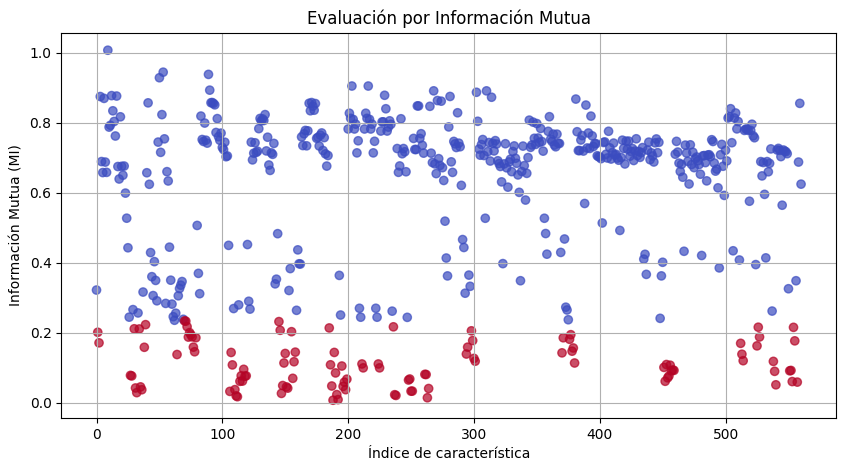

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif, mutual_info_classif
import matplotlib.pyplot as plt

# Carga de datos
# X = pd.read_csv("X_train.txt", delim_whitespace=True, header=None)
# y = pd.read_csv("y_train.txt", delim_whitespace=True, header=None).values.ravel()
X = X_train
y = y_train

# Mutual Information
mi_vals = mutual_info_classif(X, y, discrete_features=False)
mi_df = pd.DataFrame({
    'Feature': range(X.shape[1]),
    'MI': mi_vals
})

# Criterio de eliminación: baja MI

mi_threshold = np.percentile(mi_df['MI'], 20)

low_mi = mi_df['MI'] < mi_threshold
mi_df['Weak'] = low_mi

# Mostrar características débiles
candidatas = mi_df[mi_df['Weak']].sort_values(by='MI')
print(f"Características candidatas a eliminar: {len(candidatas)}")
print(candidatas[['Feature', 'MI']])

# 4. Visualización opcional
plt.figure(figsize=(10,5))
plt.scatter(range(len(mi_df)), mi_df['MI'], c=mi_df['Weak'], cmap='coolwarm', alpha=0.7)
plt.xlabel("Índice de característica")
plt.ylabel("Información Mutua (MI)")
plt.title("Evaluación por Información Mutua")
plt.grid(True)
plt.show()


---
Se puede observar que existe una caracteristica con un MI superior a 1.

In [ ]:
# Top 10 características con mayor MI
mi_df_desc = mi_df.sort_values(by='MI', ascending=False)
mi_df_desc.head(10)

,Feature,MI,Weak
9,9,1.006923,False
53,53,0.944219,False
89,89,0.937878,False
50,50,0.928346,False
203,203,0.904660,False
216,216,0.904643,False
90,90,0.892882,False
268,268,0.890876,False
310,310,0.890798,False
302,302,0.886785,False


In [ ]:
# Caracterisitica con el mayor MI
max_mi_feat = mi_df_desc['Feature'].iloc[0]
X_train.columns[max_mi_feat]

'tBodyAcc-max()-X'

#### 5.1.1. Experimento sobre la caracteristica 9 "tBodyAcc-max()-X"

In [ ]:
def knn_feature_experiment(
    train_bags, train_bag_labels, test_bags, test_labels,
    k_values, dist_metrics, feature_idx=9, return_confusion=True
):
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

    resultados = pd.DataFrame(columns=[
        'k', 'dist_metric', 'train_accuracy', 'train_f1_score',
        'test_accuracy', 'test_f1_score'
    ])
    matrices_confusion = {}
    idx = 0

    # Extract only Feature 9
    train_feat = [bag[:, feature_idx].reshape(-1, 1) for bag in train_bags]
    test_feat = [bag[:, feature_idx].reshape(-1, 1) for bag in test_bags]

    # Shuffle training and test sets
    rng = np.random.default_rng()
    train_idx = rng.permutation(len(train_feat))
    test_idx = rng.permutation(len(test_feat))

    train_feat = [train_feat[i] for i in train_idx]
    train_bag_labels = [train_bag_labels[i] for i in train_idx]
    test_feat = [test_feat[i] for i in test_idx]
    test_labels = [test_labels[i] for i in test_idx]

    for dist_metric in dist_metrics:
        for k in k_values:
            print(f"[KNN - Feature {feature_idx}] metric={dist_metric}, k={k}")

            X_train = np.vstack(train_feat)
            y_train = np.concatenate([
                [label]*len(bag) for bag, label in zip(train_feat, train_bag_labels)
            ])

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)

            knn = KNeighborsClassifier(n_neighbors=k, metric=dist_metric)
            knn.fit(X_train_scaled, y_train)

            # Training performance
            y_train_pred = knn.predict(X_train_scaled)
            train_acc = accuracy_score(y_train, y_train_pred)
            train_f1 = f1_score(y_train, y_train_pred, average='macro')

            # Test bag prediction via majority voting
            y_pred_bags = []
            for bag in test_feat:
                X_test_scaled = scaler.transform(bag)
                preds = knn.predict(X_test_scaled)
                majority = np.bincount(preds).argmax()
                y_pred_bags.append(majority)

            test_acc = accuracy_score(test_labels, y_pred_bags)
            test_f1 = f1_score(test_labels, y_pred_bags, average='macro')

            # Confusion matrix for this setting
            if return_confusion:
                key = f"k={k}_metric={dist_metric}"
                matrices_confusion[key] = confusion_matrix(test_labels, y_pred_bags)

            resultados.loc[idx] = {
                'k': k,
                'dist_metric': dist_metric,
                'train_accuracy': train_acc,
                'train_f1_score': train_f1,
                'test_accuracy': test_acc,
                'test_f1_score': test_f1
            }
            idx += 1

    if return_confusion:
        return resultados, matrices_confusion
    return resultados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, class_names=None, title="Confusion Matrix"):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [ ]:
resultados_feat, confusion_matrix_feat = knn_feature_experiment(train_bags, train_bag_labels, test_bags, test_bag_labels, [35], ['euclidean'], feature_idx=9)
resultados_feat

[KNN - Feature 9] metric=euclidean, k=35


,k,dist_metric,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,35,euclidean,0.56352,0.57181,0.555556,0.527172


🔍 k=35_metric=euclidean


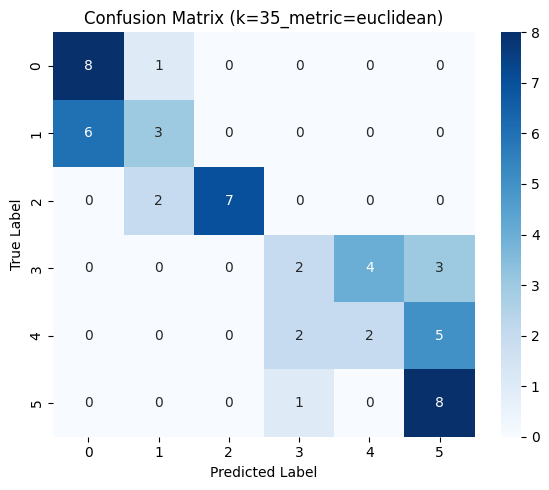

In [ ]:
class_names = [0,1,2,3,4,5]  # etiquetas

for key, cm in confusion_matrix_feat.items():
    print(f"🔍 {key}")
    plot_confusion_matrix(cm, class_names=class_names, title=f"Confusion Matrix ({key})")

In [ ]:
noisy_test_bags = add_noise_to_bags(test_bags, noise_level=1.5)
resultados_feat, confusion_matrix_feat = knn_feature_experiment(train_bags, train_bag_labels, noisy_test_bags, test_bag_labels, [35], ['euclidean'], feature_idx=9)
resultados_feat

[KNN - Feature 9] metric=euclidean, k=35


,k,dist_metric,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,35,euclidean,0.56352,0.571809,0.333333,0.167832


🔍 k=35_metric=euclidean


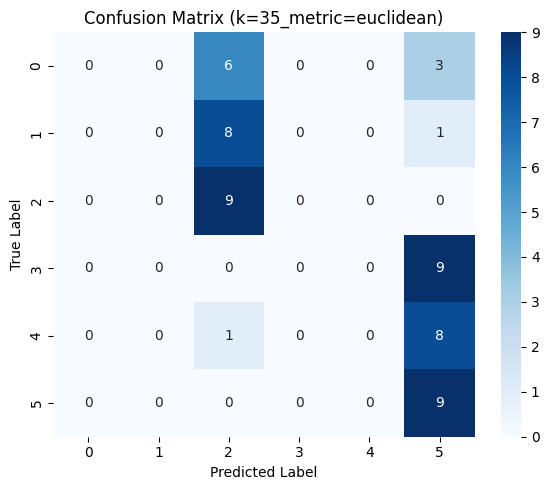

In [ ]:
class_names = [0,1,2,3,4,5]  # etiquetas

for key, cm in confusion_matrix_feat.items():
    print(f"🔍 {key}")
    plot_confusion_matrix(cm, class_names=class_names, title=f"Confusion Matrix ({key})")

#### 5.2. Selección de características usando varianza

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# Paso 1: Cargar datos
X = X_train
y = y_train

print(f"Variables originales: {X.shape[1]}")

# Paso 2: Aplicar selector de baja varianza
# Umbral típico: 0.01 o incluso más alto (dependiendo de escala)
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

# Paso 3: Identificar variables eliminadas
eliminadas_idx = np.where(~selector.get_support())[0]

print(f"Variables después de eliminar baja varianza: {X_reduced.shape[1]}")
print(f"Reducción: {100 * (X.shape[1] - X_reduced.shape[1]) / X.shape[1]:.2f}%")
print(f"Indices eliminados: {eliminadas_idx}")

Variables originales: 561
Variables después de eliminar baja varianza: 524
Reducción: 6.60%
Indices eliminados: [  0   1   2  43  44  46  47  59  60 333 334 340 343 388 402 412 413 419
 422 463 465 466 467 471 473 477 478 481 484 487 491 492 493 495 498 499
 501]


#### 5.3. Selección de características usando SFS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier  # cambio de modelo
from sklearn.model_selection import cross_val_score

# Paso 1: Cargar X e y
X = X_train
y = y_train

# Paso 2: Filtrar por MI
mi_vals = mutual_info_classif(X, y)
selected_idx = np.argsort(mi_vals)[::-1]
X_filtered = X.iloc[:, selected_idx]

# Paso 3: Escalar y seleccionar
scaler_SFS = StandardScaler()
X_train_scaled = scaler_SFS.fit_transform(X_filtered)

# Paso 4: Modelo más rápido
model = KNeighborsClassifier()

# Paso 5: SFS más liviano
sfs = SequentialFeatureSelector(
    model,
    n_features_to_select=30,
    direction='forward',
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Entrenamiento
sfs.fit(X_filtered, y)

# Obtener subconjunto
selected_features = selected_idx[sfs.get_support()]
X_sfs = X.iloc[:, selected_features]

print("Índices de características seleccionadas:", selected_features)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Índices de características seleccionadas: [ 50 274  41 559 504 508  52 129 518 179 419 139 432 478 484 465 479 340
 498 493 464  57  43  46 450 495  59  37  61  69]


In [ ]:
# Transformar instancias y bolsas con máscara SFS
support_mask = sfs.get_support()

train_bags_sfs = [
    scaler.transform(bag)[:, support_mask] for bag in train_bags
]
test_bags_sfs = [
    scaler.transform(bag)[:, support_mask] for bag in test_bags
]

In [ ]:
# Evaluate with regular test bags on SVC
resultados_svm_sfs = svmMIL_experiment(
    train_bags_sfs, train_bag_labels, test_bags_sfs, test_bag_labels,
    [1,0.1,0.01, 0.001], ['linear','rbf'], [500,1000,3000,5000]
)
resultados_svm_sfs.sort_values(by = ['test_accuracy','test_f1_macro'], ascending = False)

[SVM] Kernel=linear, C=1, max_iter=500
[SVM] Kernel=linear, C=1, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=3000
[SVM] Kernel=linear, C=1, max_iter=5000
[SVM] Kernel=linear, C=0.1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=3000
[SVM] Kernel=linear, C=0.1, max_iter=5000
[SVM] Kernel=linear, C=0.01, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=1000
[SVM] Kernel=linear, C=0.01, max_iter=3000
[SVM] Kernel=linear, C=0.01, max_iter=5000
[SVM] Kernel=linear, C=0.001, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.001, max_iter=1000
[SVM] Kernel=linear, C=0.001, max_iter=3000
[SVM] Kernel=linear, C=0.001, max_iter=5000
[SVM] Kernel=rbf, C=1, max_iter=500
[SVM] Kernel=rbf, C=1, max_iter=1000
[SVM] Kernel=rbf, C=1, max_iter=3000
[SVM] Kernel=rbf, C=1, max_iter=5000
[SVM] Kernel=rbf, C=0.1, max_iter=500
[SVM] Kernel=rbf, C=0.1, max_iter=1000
[SVM] Kernel=rbf, C=0.1, max_iter=3000
[SVM] Kernel=rbf, C=0.1, max_iter=5000
[SVM] Kernel=rbf, C=0.01, max_iter=500
[SVM] Kernel=rbf, C=0.01, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.01, max_iter=3000
[SVM] Kernel=rbf, C=0.01, max_iter=5000
[SVM] Kernel=rbf, C=0.001, max_iter=500
[SVM] Kernel=rbf, C=0.001, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.001, max_iter=3000
[SVM] Kernel=rbf, C=0.001, max_iter=5000


,kernel,C,max_iter,train_accuracy,train_f1_macro,test_accuracy,test_f1_macro
2,linear,1.000,3000,0.776659,0.777249,0.851852,0.828697
3,linear,1.000,5000,0.778700,0.780423,0.851852,0.828697
18,rbf,1.000,3000,0.791893,0.797415,0.851852,0.828697
19,rbf,1.000,5000,0.791893,0.797415,0.851852,0.828697
6,linear,0.100,3000,0.760337,0.758169,0.833333,0.796809
7,linear,0.100,5000,0.760337,0.758169,0.833333,0.796809
21,rbf,0.100,1000,0.718988,0.692770,0.814815,0.801249
5,linear,0.100,1000,0.747688,0.723961,0.814815,0.759202
17,rbf,1.000,1000,0.779516,0.767868,0.814815,0.759202
1,linear,1.000,1000,0.749592,0.746720,0.814815,0.751424


In [ ]:
# Evaluate with noisy test bags on SVC
noisy_test_bags_SFS = add_noise_to_bags(test_bags_sfs, noise_level=1.5)
resultados_svm_sfs = svmMIL_experiment(
    train_bags_sfs, train_bag_labels, noisy_test_bags_SFS, test_bag_labels,
    [1,0.1,0.01, 0.001], ['linear','rbf'], [500,1000,3000,5000]
)
resultados_svm_sfs.sort_values(by = ['test_accuracy','test_f1_macro'], ascending = False)

[SVM] Kernel=linear, C=1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=1000
[SVM] Kernel=linear, C=1, max_iter=3000
[SVM] Kernel=linear, C=1, max_iter=5000
[SVM] Kernel=linear, C=0.1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=1000
[SVM] Kernel=linear, C=0.1, max_iter=3000
[SVM] Kernel=linear, C=0.1, max_iter=5000
[SVM] Kernel=linear, C=0.01, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=3000
[SVM] Kernel=linear, C=0.01, max_iter=5000
[SVM] Kernel=linear, C=0.001, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.001, max_iter=1000
[SVM] Kernel=linear, C=0.001, max_iter=3000
[SVM] Kernel=linear, C=0.001, max_iter=5000
[SVM] Kernel=rbf, C=1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=1, max_iter=1000
[SVM] Kernel=rbf, C=1, max_iter=3000
[SVM] Kernel=rbf, C=1, max_iter=5000
[SVM] Kernel=rbf, C=0.1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.1, max_iter=1000
[SVM] Kernel=rbf, C=0.1, max_iter=3000
[SVM] Kernel=rbf, C=0.1, max_iter=5000
[SVM] Kernel=rbf, C=0.01, max_iter=500
[SVM] Kernel=rbf, C=0.01, max_iter=1000
[SVM] Kernel=rbf, C=0.01, max_iter=3000
[SVM] Kernel=rbf, C=0.01, max_iter=5000
[SVM] Kernel=rbf, C=0.001, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.001, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.001, max_iter=3000
[SVM] Kernel=rbf, C=0.001, max_iter=5000


,kernel,C,max_iter,train_accuracy,train_f1_macro,test_accuracy,test_f1_macro
9,linear,0.010,1000,0.729461,0.704406,0.740741,0.676345
10,linear,0.010,3000,0.737486,0.729379,0.740741,0.676345
11,linear,0.010,5000,0.737486,0.729379,0.740741,0.676345
13,linear,0.001,1000,0.680631,0.649776,0.740741,0.676338
14,linear,0.001,3000,0.689472,0.672127,0.740741,0.676338
15,linear,0.001,5000,0.689472,0.672127,0.740741,0.676338
5,linear,0.100,1000,0.748232,0.723298,0.722222,0.662047
6,linear,0.100,3000,0.760337,0.758169,0.685185,0.625435
7,linear,0.100,5000,0.760337,0.758169,0.685185,0.625435
4,linear,0.100,500,0.723613,0.681182,0.592593,0.534913


In [ ]:
# Evaluate with regular test bags on KNN
resultados_knn_sfs = knnMIL_experiment(
    train_bags_sfs, train_bag_labels, test_bags_sfs, test_bag_labels,
    [5,10,15,20,25,30,35], ['euclidean']
)
resultados_knn_sfs.sort_values(by = ['test_accuracy','test_f1_score'], ascending = False)

[KNN] Fitting with metric=euclidean, k=5
[KNN] Fitting with metric=euclidean, k=10
[KNN] Fitting with metric=euclidean, k=15
[KNN] Fitting with metric=euclidean, k=20
[KNN] Fitting with metric=euclidean, k=25
[KNN] Fitting with metric=euclidean, k=30
[KNN] Fitting with metric=euclidean, k=35


,k,dist_metric,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,5,euclidean,0.824266,0.832597,0.833333,0.830201
2,15,euclidean,0.777339,0.784187,0.814815,0.809068
3,20,euclidean,0.771627,0.778264,0.796296,0.787069
1,10,euclidean,0.790533,0.798134,0.777778,0.775056
5,30,euclidean,0.757345,0.762424,0.740741,0.718160
6,35,euclidean,0.752720,0.757571,0.740741,0.718160
4,25,euclidean,0.764962,0.770321,0.740741,0.717472


In [ ]:
# Evaluate with noisy test bags on KNN
noisy_test_bags = add_noise_to_bags(test_bags_sfs, noise_level=1.5)
resultados_knn_sfs = knnMIL_experiment(
    train_bags_sfs, train_bag_labels, noisy_test_bags_SFS, test_bag_labels,
    [5,10,15,20,25,30,35], ['euclidean']
)
resultados_knn_sfs.sort_values(by = ['test_accuracy','test_f1_score'], ascending = False)

[KNN] Fitting with metric=euclidean, k=5
[KNN] Fitting with metric=euclidean, k=10
[KNN] Fitting with metric=euclidean, k=15
[KNN] Fitting with metric=euclidean, k=20
[KNN] Fitting with metric=euclidean, k=25
[KNN] Fitting with metric=euclidean, k=30
[KNN] Fitting with metric=euclidean, k=35


,k,dist_metric,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,5,euclidean,0.824266,0.832597,0.777778,0.735948
1,10,euclidean,0.790533,0.798134,0.740741,0.700710
3,20,euclidean,0.771627,0.778264,0.740741,0.679617
4,25,euclidean,0.764962,0.770321,0.722222,0.660278
6,35,euclidean,0.752720,0.757571,0.722222,0.660278
2,15,euclidean,0.777339,0.784187,0.722222,0.658135
5,30,euclidean,0.757345,0.762424,0.703704,0.640857


#### 5.4. PCA

In [ ]:
# Solo PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print(f"Variables originales: {X_train.shape[1]}")

# Preparar los datos
X = np.vstack(train_bags)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# Aplicar PCA (mantener 95% de la varianza explicada)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_train_scaled)

print("Variables finales después de PCA:", X_pca.shape[1])
print(f"Reducción: {100 * (X.shape[1] - X_pca.shape[1]) / X.shape[1]:.2f}%")

Variables originales: 561
Variables finales después de PCA: 102
Reducción: 81.82%


In [ ]:
# Transformar las bolsas (train y test) con scaler + PCA
train_bags_pca = [pca.transform(scaler.transform(bag)) for bag in train_bags]
test_bags_pca = [pca.transform(scaler.transform(bag)) for bag in test_bags]

In [ ]:
# Evaluar SVM usando los resultados de PCA
resultados_PCA_svm = svmMIL_experiment(
    train_bags_pca, train_bag_labels,
    test_bags_pca, test_bag_labels,
    [1,0.1,0.01,0.001], ['linear','rbf'], [500,1000,3000,5000]
)
resultados_PCA_svm.sort_values(by = ['test_accuracy','test_f1_macro'], ascending = False)

[SVM] Kernel=linear, C=1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=1000
[SVM] Kernel=linear, C=1, max_iter=3000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=1, max_iter=5000
[SVM] Kernel=linear, C=0.1, max_iter=500
[SVM] Kernel=linear, C=0.1, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.1, max_iter=3000
[SVM] Kernel=linear, C=0.1, max_iter=5000
[SVM] Kernel=linear, C=0.01, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.01, max_iter=1000
[SVM] Kernel=linear, C=0.01, max_iter=3000
[SVM] Kernel=linear, C=0.01, max_iter=5000
[SVM] Kernel=linear, C=0.001, max_iter=500
[SVM] Kernel=linear, C=0.001, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=linear, C=0.001, max_iter=3000
[SVM] Kernel=linear, C=0.001, max_iter=5000
[SVM] Kernel=rbf, C=1, max_iter=500
[SVM] Kernel=rbf, C=1, max_iter=1000
[SVM] Kernel=rbf, C=1, max_iter=3000
[SVM] Kernel=rbf, C=1, max_iter=5000
[SVM] Kernel=rbf, C=0.1, max_iter=500


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.1, max_iter=1000
[SVM] Kernel=rbf, C=0.1, max_iter=3000
[SVM] Kernel=rbf, C=0.1, max_iter=5000
[SVM] Kernel=rbf, C=0.01, max_iter=500
[SVM] Kernel=rbf, C=0.01, max_iter=1000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[SVM] Kernel=rbf, C=0.01, max_iter=3000
[SVM] Kernel=rbf, C=0.01, max_iter=5000
[SVM] Kernel=rbf, C=0.001, max_iter=500
[SVM] Kernel=rbf, C=0.001, max_iter=1000
[SVM] Kernel=rbf, C=0.001, max_iter=3000
[SVM] Kernel=rbf, C=0.001, max_iter=5000


,kernel,C,max_iter,train_accuracy,train_f1_macro,test_accuracy,test_f1_macro
8,linear,0.010,500,0.972933,0.974624,1.000000,1.000000
9,linear,0.010,1000,0.972933,0.974625,1.000000,1.000000
10,linear,0.010,3000,0.972933,0.974608,1.000000,1.000000
11,linear,0.010,5000,0.972933,0.974608,1.000000,1.000000
16,rbf,1.000,500,0.991703,0.992345,1.000000,1.000000
17,rbf,1.000,1000,0.991295,0.991969,1.000000,1.000000
18,rbf,1.000,3000,0.991295,0.991969,1.000000,1.000000
19,rbf,1.000,5000,0.991295,0.991969,1.000000,1.000000
1,linear,1.000,1000,0.922470,0.928172,0.981481,0.981424
2,linear,1.000,3000,0.970212,0.972464,0.981481,0.981424


In [ ]:
# Evaluar SVM usando los resultados de PCA + noise
noisy_test_bags_PCA = add_noise_to_bags(test_bags_pca, noise_level=1.5)
resultados_PCA_svm = svmMIL_experiment(
    train_bags_pca, train_bag_labels,
    noisy_test_bags_PCA, test_bag_labels,
    [1,0.1,0.01, 0.001], ['linear','rbf'], [500,1000,3000,5000]
)
resultados_PCA_svm.sort_values(by = ['test_accuracy','test_f1_macro'], ascending = False)

[SVM] Kernel=linear, C=1, max_iter=500
[SVM] Kernel=linear, C=1, max_iter=1000
[SVM] Kernel=linear, C=1, max_iter=3000
[SVM] Kernel=linear, C=1, max_iter=5000
[SVM] Kernel=linear, C=0.1, max_iter=500
[SVM] Kernel=linear, C=0.1, max_iter=1000
[SVM] Kernel=linear, C=0.1, max_iter=3000
[SVM] Kernel=linear, C=0.1, max_iter=5000
[SVM] Kernel=linear, C=0.01, max_iter=500
[SVM] Kernel=linear, C=0.01, max_iter=1000
[SVM] Kernel=linear, C=0.01, max_iter=3000
[SVM] Kernel=linear, C=0.01, max_iter=5000
[SVM] Kernel=linear, C=0.001, max_iter=500
[SVM] Kernel=linear, C=0.001, max_iter=1000
[SVM] Kernel=linear, C=0.001, max_iter=3000
[SVM] Kernel=linear, C=0.001, max_iter=5000
[SVM] Kernel=rbf, C=1, max_iter=500
[SVM] Kernel=rbf, C=1, max_iter=1000
[SVM] Kernel=rbf, C=1, max_iter=3000
[SVM] Kernel=rbf, C=1, max_iter=5000
[SVM] Kernel=rbf, C=0.1, max_iter=500
[SVM] Kernel=rbf, C=0.1, max_iter=1000
[SVM] Kernel=rbf, C=0.1, max_iter=3000
[SVM] Kernel=rbf, C=0.1, max_iter=5000
[SVM] Kernel=rbf, C=0.01, 

,kernel,C,max_iter,train_accuracy,train_f1_macro,test_accuracy,test_f1_macro
5,linear,0.100,1000,0.979189,0.980798,0.981481,0.981424
6,linear,0.100,3000,0.980141,0.981642,0.981481,0.981424
7,linear,0.100,5000,0.980686,0.982181,0.981481,0.981424
0,linear,1.000,500,0.925871,0.931598,0.962963,0.962848
2,linear,1.000,3000,0.967628,0.970070,0.962963,0.962848
3,linear,1.000,5000,0.982318,0.983691,0.962963,0.962848
4,linear,0.100,500,0.968852,0.971253,0.962963,0.962848
8,linear,0.010,500,0.973205,0.974874,0.962963,0.962848
9,linear,0.010,1000,0.972933,0.974624,0.962963,0.962848
10,linear,0.010,3000,0.973069,0.974735,0.962963,0.962848


In [ ]:
# Evaluar KNN usando los resultados de PCA
resultados_PCA_knn = knnMIL_experiment(
    train_bags_pca, train_bag_labels,
    test_bags_pca, test_bag_labels,
    [5,10,15,20,25,30,35], ['euclidean']
)
resultados_PCA_knn.sort_values(by = ['test_accuracy','test_f1_score'], ascending = False)

[KNN] Fitting with metric=euclidean, k=5
[KNN] Fitting with metric=euclidean, k=10
[KNN] Fitting with metric=euclidean, k=15
[KNN] Fitting with metric=euclidean, k=20
[KNN] Fitting with metric=euclidean, k=25
[KNN] Fitting with metric=euclidean, k=30
[KNN] Fitting with metric=euclidean, k=35


,k,dist_metric,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,5,euclidean,0.963139,0.963279,0.851852,0.835543
1,10,euclidean,0.943417,0.943058,0.833333,0.817055
2,15,euclidean,0.925598,0.924665,0.777778,0.759759
5,30,euclidean,0.869831,0.863345,0.685185,0.668577
4,25,euclidean,0.886425,0.882705,0.685185,0.662479
3,20,euclidean,0.904516,0.902110,0.685185,0.653505
6,35,euclidean,0.852285,0.843926,0.666667,0.652381


In [ ]:
# Evaluar KNN usando los resultados de PCA + noise
noisy_test_bags_PCA = add_noise_to_bags(test_bags_pca, noise_level=1.5)
resultados_PCA_knn = knnMIL_experiment(
    train_bags_pca, train_bag_labels,
    noisy_test_bags_PCA, test_bag_labels,
    [5,10,15,20,25,30,35], ['euclidean']
)
resultados_PCA_knn.sort_values(by = ['test_accuracy','test_f1_score'], ascending = False)

[KNN] Fitting with metric=euclidean, k=5
[KNN] Fitting with metric=euclidean, k=10
[KNN] Fitting with metric=euclidean, k=15
[KNN] Fitting with metric=euclidean, k=20
[KNN] Fitting with metric=euclidean, k=25
[KNN] Fitting with metric=euclidean, k=30
[KNN] Fitting with metric=euclidean, k=35


,k,dist_metric,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,5,euclidean,0.963139,0.963279,0.851852,0.850618
1,10,euclidean,0.943417,0.943058,0.759259,0.740861
2,15,euclidean,0.925598,0.924665,0.740741,0.713689
3,20,euclidean,0.904516,0.902110,0.703704,0.684624
5,30,euclidean,0.869831,0.863345,0.648148,0.613287
6,35,euclidean,0.852285,0.843926,0.629630,0.591441
4,25,euclidean,0.886425,0.882705,0.611111,0.567009
